### Name: Partha Mehta

***GOAL:***

* Cluster AirBnB's in San Francisco based on quantitative and qualitative features with a geographical visualization to understand what kind of Airbnbs are similar

In [69]:
from google.colab import drive
drive.mount('/content/drive/')

!pwd

import os
os.chdir('/content/drive/MyDrive/airbnb-data-analysis')

!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/airbnb-data-analysis
/content/drive/MyDrive/airbnb-data-analysis


***1. Setting up imports and data***

In [70]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import re
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize

%matplotlib inline

In [71]:
listings = pd.read_csv('detailed_listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,144978,https://www.airbnb.com/rooms/144978,20221204162417,2022-12-04,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,...,4.81,4.81,4.66,NaN,f,9,4,5,0,0.86
1,958,https://www.airbnb.com/rooms/958,20221204162417,2022-12-04,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.28
2,5858,https://www.airbnb.com/rooms/5858,20221204162417,2022-12-04,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.67
3,8142,https://www.airbnb.com/rooms/8142,20221204162417,2022-12-04,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.67,4.67,NaN,f,12,0,12,0,0.09
4,8339,https://www.airbnb.com/rooms/8339,20221204162417,2022-12-04,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17


In [72]:
reviews = pd.read_csv('detailed_reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,V Jillian,Holly's place was great. It was exactly what I...


In [73]:
joined = pd.merge(listings, reviews, how='inner', left_on='id', right_on='listing_id')
joined.head()

,id_x,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,144978,https://www.airbnb.com/rooms/144978,20221204162417,2022-12-04,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,...,4,5,0,0.86,144978,364955,2011-07-10,772499,Mickaël,I arrived from France for few days and had a v...
1,144978,https://www.airbnb.com/rooms/144978,20221204162417,2022-12-04,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,...,4,5,0,0.86,144978,457573,2011-08-19,776495,Alex,"Jay was absolutely wonderful. Helpful, warm, ..."
2,144978,https://www.airbnb.com/rooms/144978,20221204162417,2022-12-04,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,...,4,5,0,0.86,144978,478279,2011-08-27,736566,Jennifer,"Jay was a wonderful host. She was welcoming, k..."
3,144978,https://www.airbnb.com/rooms/144978,20221204162417,2022-12-04,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,...,4,5,0,0.86,144978,511238,2011-09-07,132066,Christina,"The bathrooms are in fair condition, but every..."
4,144978,https://www.airbnb.com/rooms/144978,20221204162417,2022-12-04,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,...,4,5,0,0.86,144978,565394,2011-09-25,934878,Olga,I stayed for 20 days and the place was comfort...


In [74]:
joined.columns

Index(['id_x', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', '

In [75]:
df_dropped = joined.drop(columns = ['listing_url', 'scrape_id', 'last_scraped', 'id_x','host_url', 'host_thumbnail_url', 
                                    'neighbourhood_group_cleansed', 'minimum_minimum_nights', 'maximum_minimum_nights', 
                                    'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
                                    'calendar_updated', 'license', 'id_y'])
df_dropped.head()

,source,name,description,neighborhood_overview,picture_url,host_id,host_name,host_since,host_location,host_about,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,date,reviewer_id,reviewer_name,comments
0,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,Jay,2010-08-29,"San Francisco, CA","Originally from New York, I work in healthcar...",...,9,4,5,0,0.86,144978,2011-07-10,772499,Mickaël,I arrived from France for few days and had a v...
1,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,Jay,2010-08-29,"San Francisco, CA","Originally from New York, I work in healthcar...",...,9,4,5,0,0.86,144978,2011-08-19,776495,Alex,"Jay was absolutely wonderful. Helpful, warm, ..."
2,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,Jay,2010-08-29,"San Francisco, CA","Originally from New York, I work in healthcar...",...,9,4,5,0,0.86,144978,2011-08-27,736566,Jennifer,"Jay was a wonderful host. She was welcoming, k..."
3,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,Jay,2010-08-29,"San Francisco, CA","Originally from New York, I work in healthcar...",...,9,4,5,0,0.86,144978,2011-09-07,132066,Christina,"The bathrooms are in fair condition, but every..."
4,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,Jay,2010-08-29,"San Francisco, CA","Originally from New York, I work in healthcar...",...,9,4,5,0,0.86,144978,2011-09-25,934878,Olga,I stayed for 20 days and the place was comfort...


In [76]:
listing_comments = df_dropped[{'listing_id', 'comments'}]
listing_comments.comments = listing_comments.comments.astype(str)
grouped_comments = listing_comments.groupby(['listing_id'])['comments'].apply(lambda x: ' '.join(x)).to_frame()
grouped_comments.head()

<ipython-input-76-dfe14ad6649a>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  listing_comments = df_dropped[{'listing_id', 'comments'}]
<ipython-input-76-dfe14ad6649a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_comments.comments = listing_comments.comments.astype(str)


,comments
listing_id,
958,"Our experience was, without a doubt, a five st..."
5858,We had a fabulous time staying with Philip and...
8142,"Excellent! The space is clean and quiet, and t..."
8339,My stay was wonderful in many ways; the apartm...
8739,Ivan and Wendy have been superb hosts: we coul...


In [77]:
#numerical 
listings2 = listings.copy()

listing2num = listings2[["accommodates", "beds", "bedrooms", "price", "minimum_nights", "maximum_nights", "number_of_reviews", "review_scores_rating", "bathrooms_text", "id"]]
listing2num['price'] = listing2num['price'].str[1:]
listing2num['price'] = listing2num.iloc[:,3].str.replace(',', '').astype(float)

listing2num['bathrooms_text'] = listing2num.bathrooms_text.str.extract('(\d+)').astype(float)

listing2num = listing2num.rename(columns={'bathrooms_text': 'bathrooms'})
listing2num.dropna(inplace=True)
listing2num

<ipython-input-77-1449fe04f14a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing2num['price'] = listing2num['price'].str[1:]
<ipython-input-77-1449fe04f14a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing2num['price'] = listing2num.iloc[:,3].str.replace(',', '').astype(float)
<ipython-input-77-1449fe04f14a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,accommodates,beds,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,id
1,3,2.0,1.0,194.0,2,30,371,4.86,1.0,958
2,4,2.0,2.0,235.0,30,60,111,4.88,1.0,5858
3,1,1.0,1.0,56.0,32,90,9,4.67,4.0,8142
4,4,2.0,2.0,575.0,9,91,28,4.87,1.0,8339
5,3,1.0,1.0,129.0,1,26,761,4.91,1.0,8739
...,...,...,...,...,...,...,...,...,...,...
6784,2,1.0,1.0,175.0,3,28,318,4.95,1.0,467507
6785,12,4.0,4.0,399.0,2,29,63,4.57,2.0,468490
6786,2,1.0,1.0,125.0,1,98,308,4.91,1.0,470686
6787,6,4.0,3.0,70.0,2,1125,129,4.91,1.0,474107


In [78]:
#categorical
listings2cat = listings2[["neighbourhood_cleansed", "property_type", "room_type", "bathrooms_text"]]
listings2cat

,neighbourhood_cleansed,property_type,room_type,bathrooms_text
0,Pacific Heights,Private room in rental unit,Private room,NaN
1,Western Addition,Entire serviced apartment,Entire home/apt,1 bath
2,Bernal Heights,Entire rental unit,Entire home/apt,1 bath
3,Haight Ashbury,Private room in rental unit,Private room,4 shared baths
4,Western Addition,Entire condo,Entire home/apt,1.5 baths
...,...,...,...,...
6784,Bernal Heights,Entire guest suite,Entire home/apt,1 bath
6785,Russian Hill,Entire condo,Entire home/apt,2.5 baths
6786,Mission,Private room in condo,Private room,1 private bath
6787,Excelsior,Private room in home,Private room,1 shared bath


In [79]:
listings2cat.neighbourhood_cleansed.value_counts()

Downtown/Civic Center    814
Mission                  584
South of Market          499
Western Addition         451
Nob Hill                 345
Outer Sunset             298
Haight Ashbury           289
Castro/Upper Market      283
Bernal Heights           282
Noe Valley               239
Marina                   197
Inner Richmond           184
Outer Richmond           180
Financial District       173
Bayview                  163
Pacific Heights          161
North Beach              160
Excelsior                158
Russian Hill             154
Potrero Hill             151
Inner Sunset             149
Parkside                 137
Outer Mission            117
Chinatown                114
West of Twin Peaks        95
Ocean View                90
Visitacion Valley         63
Lakeshore                 57
Glen Park                 53
Twin Peaks                49
Crocker Amazon            43
Presidio Heights          27
Diamond Heights           13
Presidio                   8
Seacliff      

In [80]:
listings2nume = listing2num.copy()
#remove outliers
listings2nume = listings2nume[listings2nume.maximum_nights < 2000]
listings2nume = listings2nume[listings2nume.price < 9999]

listings2nume['property_type'] = listings2['property_type']
listings2nume['property_type'].unique() #replaced with private, entire space and shared space
def check_property_type(x):
  if "Private" in x:
    return "Private Space"
  elif "Shared" in x:
    return "Shared Space"
  else:
    return "Entire Space"
listings2nume.property_type = listings2nume.property_type.apply(check_property_type)
one_hot_property_type = pd.get_dummies(listings2nume.property_type)
listings_joined = listings2nume.join(one_hot_property_type)
listings_joined_dropped = listings_joined.drop(columns=['property_type'])
listings_joined_dropped

,accommodates,beds,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,id,Entire Space,Private Space,Shared Space
1,3,2.0,1.0,194.0,2,30,371,4.86,1.0,958,1,0,0
2,4,2.0,2.0,235.0,30,60,111,4.88,1.0,5858,1,0,0
3,1,1.0,1.0,56.0,32,90,9,4.67,4.0,8142,0,1,0
4,4,2.0,2.0,575.0,9,91,28,4.87,1.0,8339,1,0,0
5,3,1.0,1.0,129.0,1,26,761,4.91,1.0,8739,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,2,1.0,1.0,175.0,3,28,318,4.95,1.0,467507,1,0,0
6785,12,4.0,4.0,399.0,2,29,63,4.57,2.0,468490,1,0,0
6786,2,1.0,1.0,125.0,1,98,308,4.91,1.0,470686,0,1,0
6787,6,4.0,3.0,70.0,2,1125,129,4.91,1.0,474107,0,1,0


***2. EDA - Correlation Matrices & Other Visualisations***

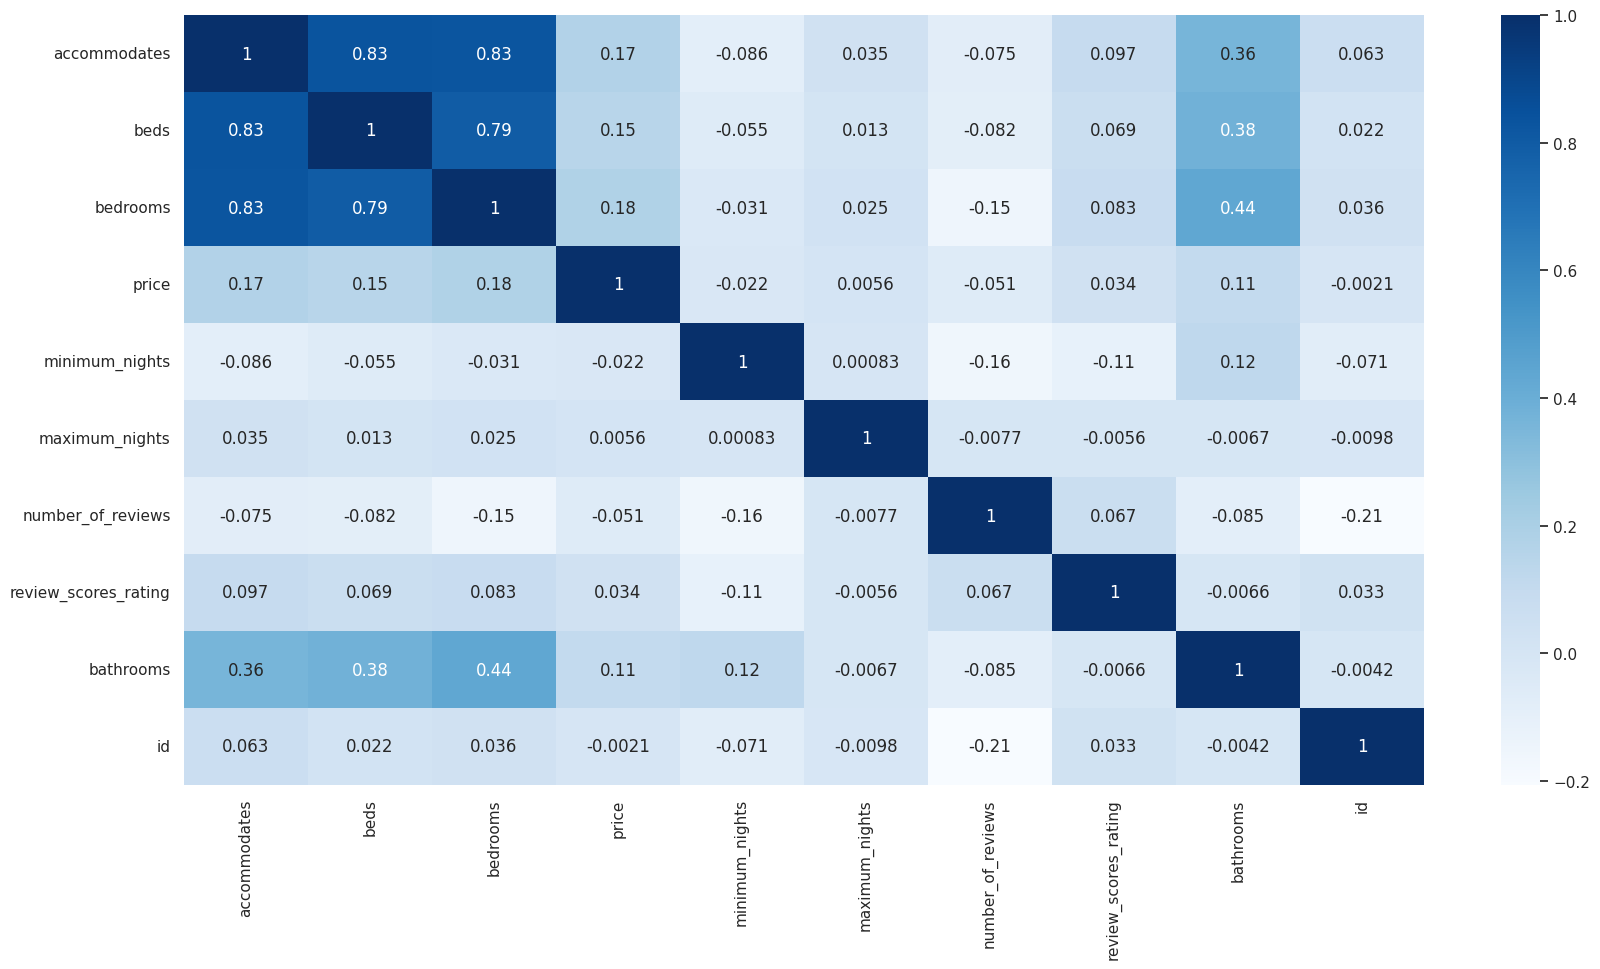

In [81]:
#creating correlation matrix: numerical values
plt.figure(figsize=(20,10))
cor = listing2num.corr()

sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [82]:
#print out top 7 highest correlations for numerical features
print(listing2num[["accommodates", "beds"]].corr())
print(listing2num[["accommodates", "bedrooms"]].corr())
print(listing2num[["beds", "bedrooms"]].corr())
print(listing2num[["accommodates", "bathrooms"]].corr())
print(listing2num[["beds", "bathrooms"]].corr())
print(listing2num[["bedrooms", "bathrooms"]].corr())
print(listing2num[["minimum_nights", "maximum_nights"]].corr())

              accommodates      beds
accommodates      1.000000  0.831942
beds              0.831942  1.000000
              accommodates  bedrooms
accommodates      1.000000  0.826573
bedrooms          0.826573  1.000000
              beds  bedrooms
beds      1.000000  0.794998
bedrooms  0.794998  1.000000
              accommodates  bathrooms
accommodates      1.000000   0.362419
bathrooms         0.362419   1.000000
               beds  bathrooms
beds       1.000000   0.382047
bathrooms  0.382047   1.000000
           bedrooms  bathrooms
bedrooms   1.000000   0.437627
bathrooms  0.437627   1.000000
                minimum_nights  maximum_nights
minimum_nights        1.000000        0.000833
maximum_nights        0.000833        1.000000


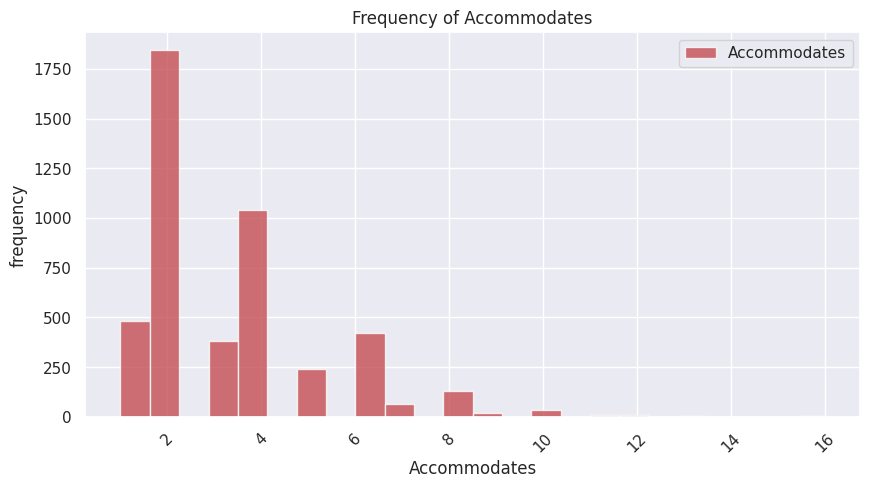

In [83]:
#other visualisations for numerical
import requests
import bs4 as bs
import pandas as pd
import numpy as np
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(listing2num['accommodates'], bins = 24, color='r', label='Accommodates',alpha=0.8)
plt.title('Frequency of Accommodates')
plt.legend(loc='upper right')
plt.xlabel('Accommodates')
plt.ylabel('frequency')

plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='accommodates', ylabel='Count'>

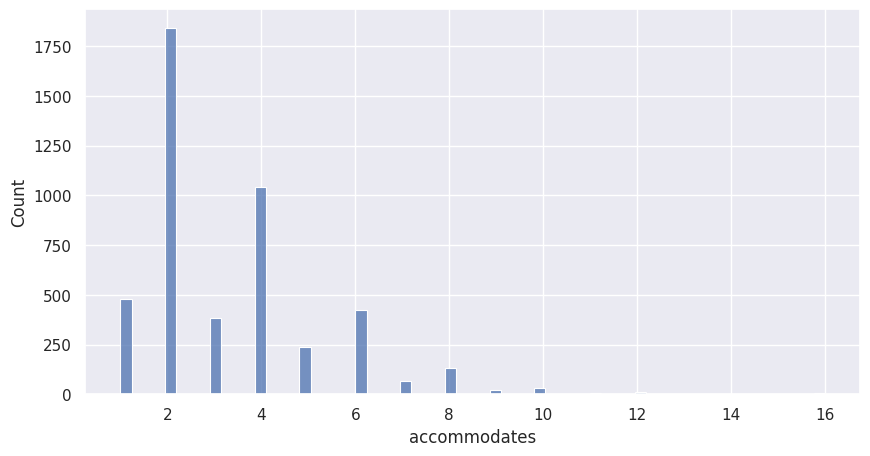

In [84]:
sns.histplot(listing2num.accommodates)

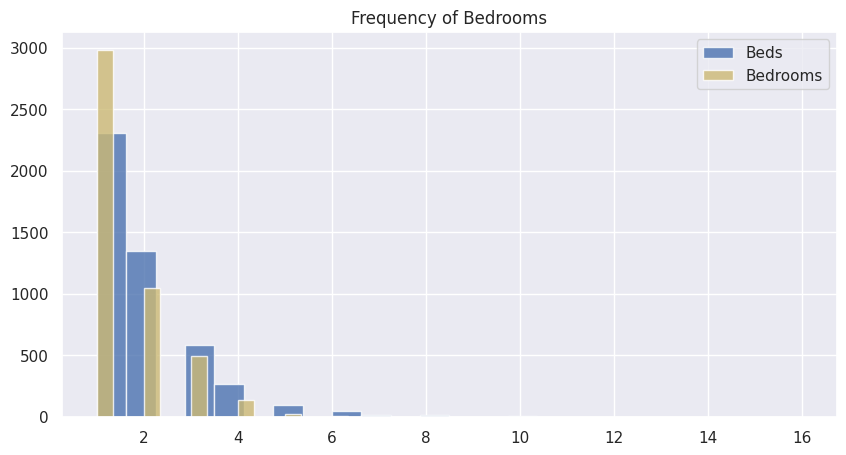

In [85]:
plt.hist(listing2num['beds'], bins = 24, color='b', label='Beds',alpha=0.8)
plt.title('Frequency of Beds')
plt.legend(loc='upper right')

plt.hist(listing2num['bedrooms'], bins = 24, color='y', label='Bedrooms',alpha=0.8)
plt.title('Frequency of Bedrooms')
plt.legend(loc='upper right')

plt.show()

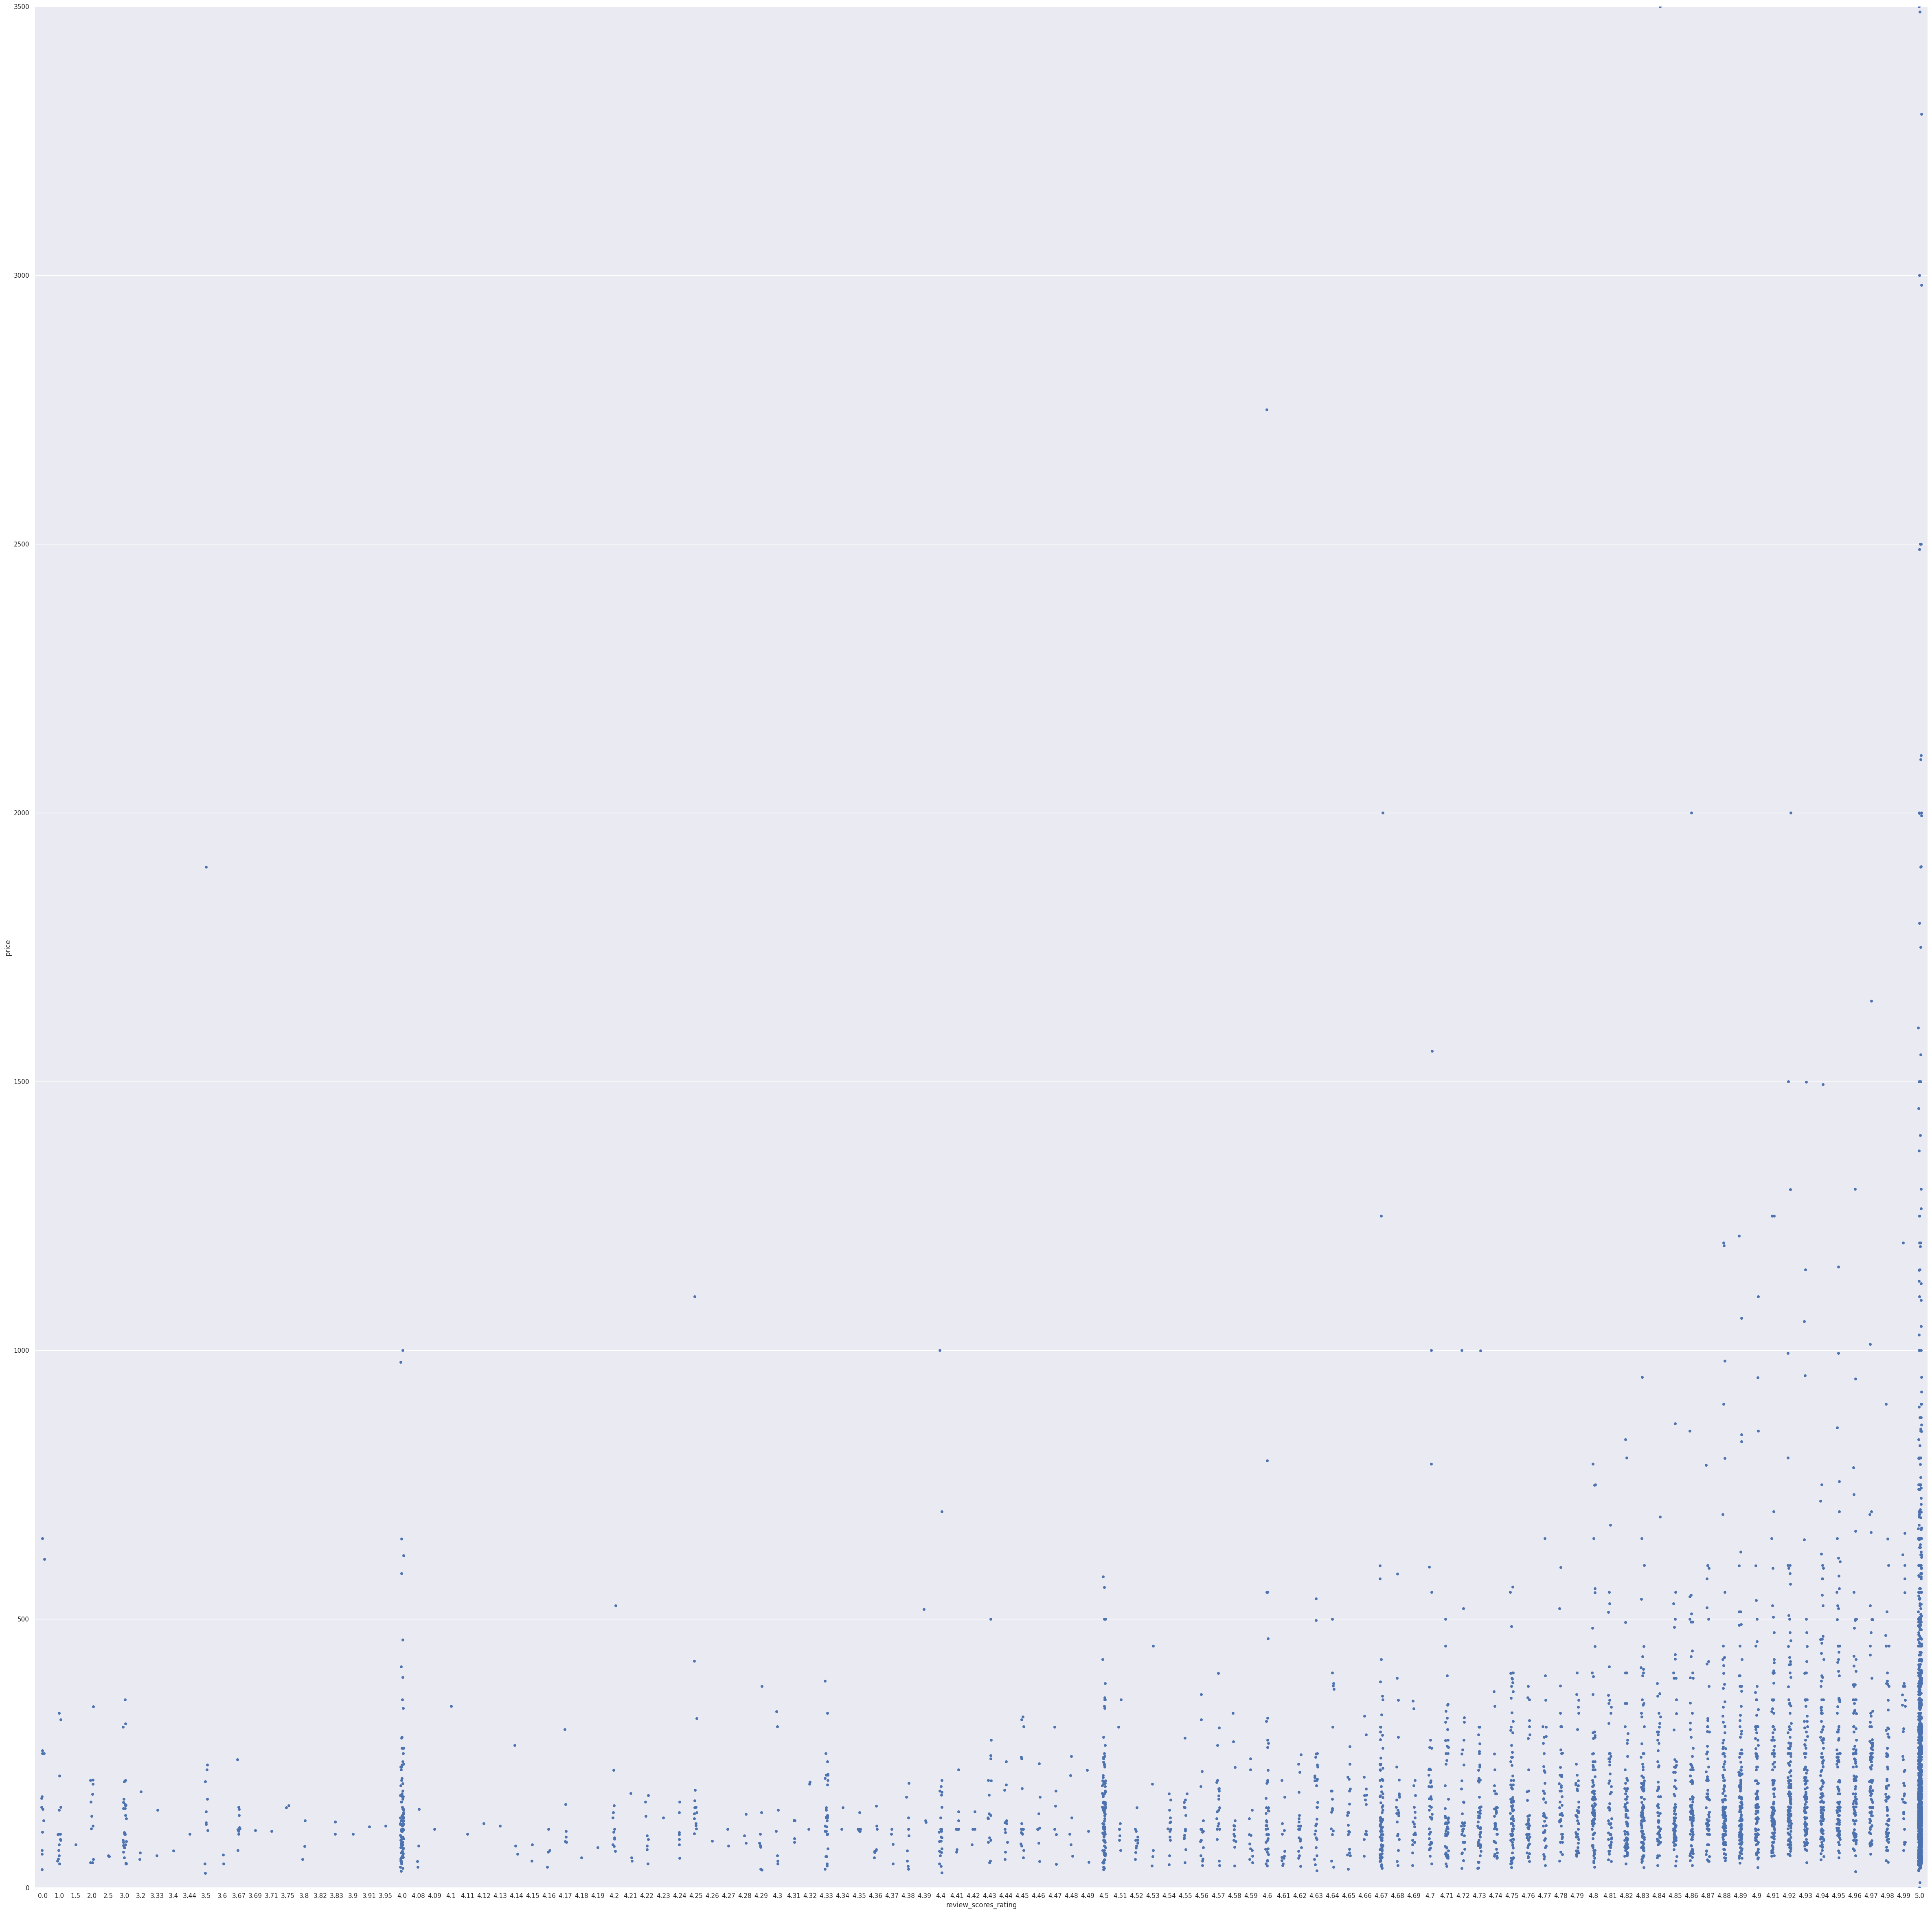

In [86]:
sns.set(rc={'figure.figsize':(60,60)})
review_vs_price = sns.stripplot(x='review_scores_rating', y='price', data = listing2num, jitter=True)
review_vs_price.set(ylim=(0, 3500))
plt.show()

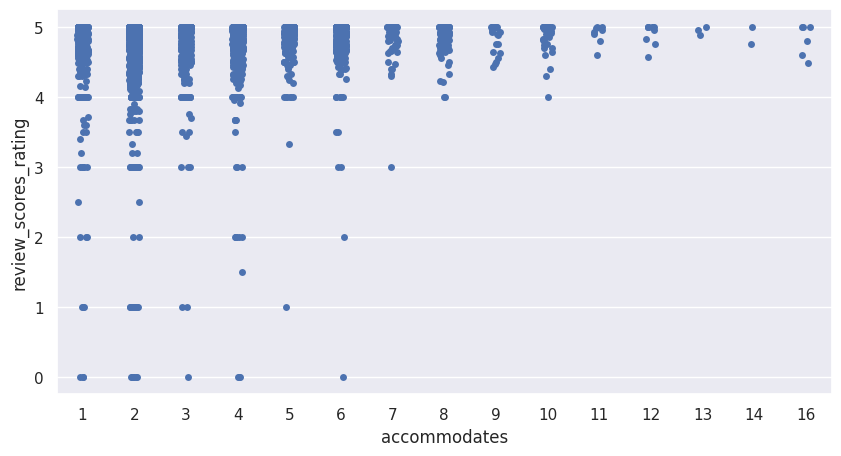

In [87]:
sns.set(rc={'figure.figsize':(10,5)})
sns.stripplot(x='accommodates', y='review_scores_rating', data = listing2num, jitter=True)
plt.show()

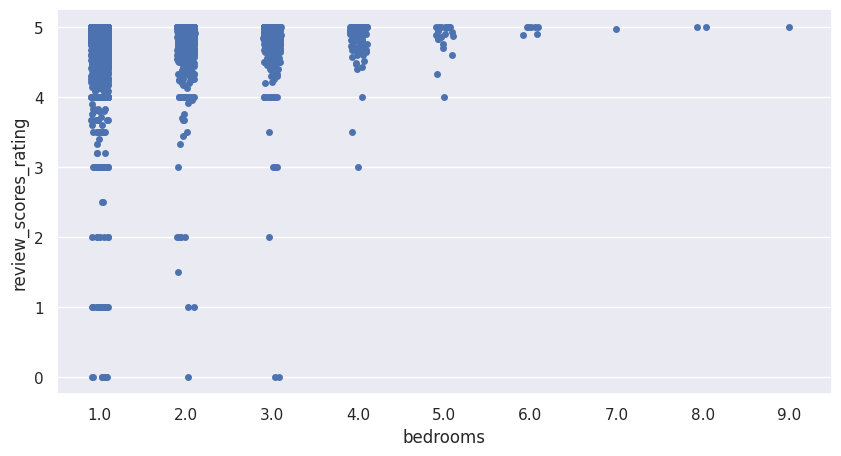

In [88]:
sns.set(rc={'figure.figsize':(10,5)})
sns.stripplot(x='bedrooms', y='review_scores_rating', data = listing2num, jitter=True)
plt.show()

***Visualizing with Categorical Features***

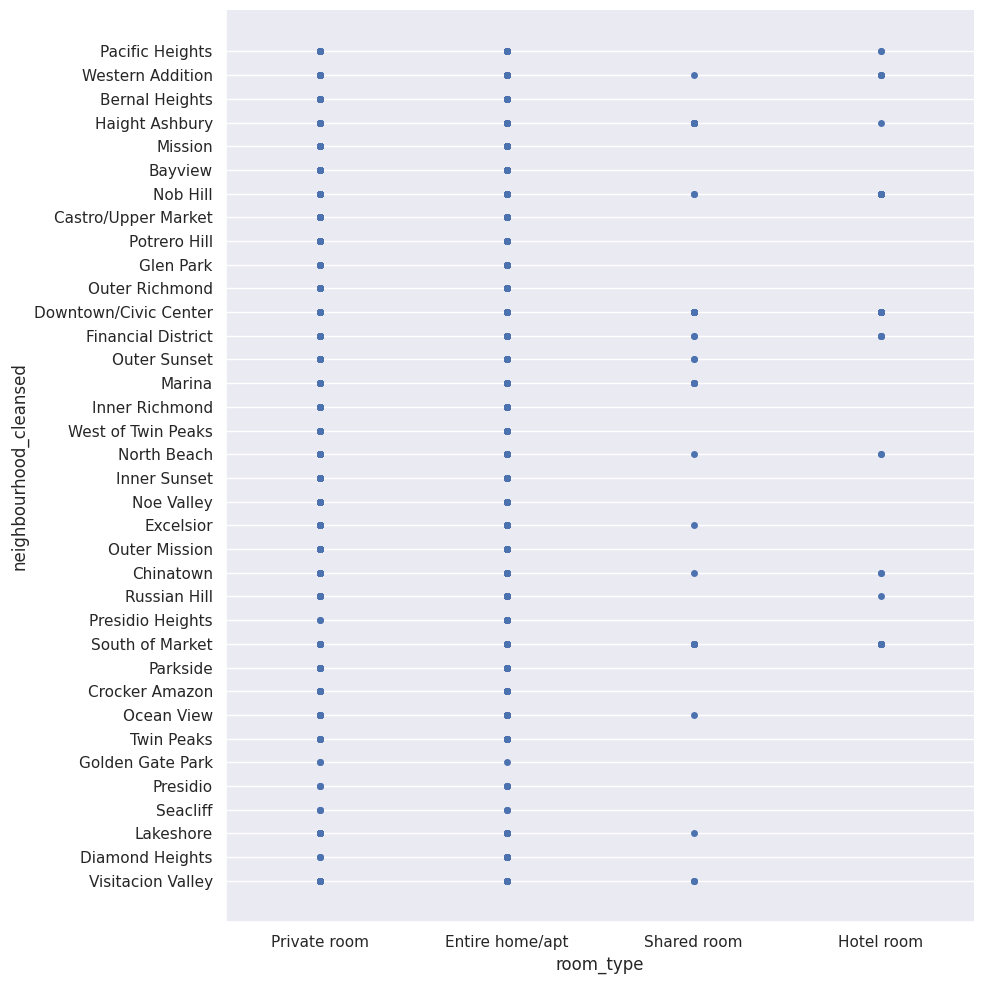

In [89]:
#neighbourhood_cleansed & room_type
listings2cat_2 = listings2cat[['neighbourhood_cleansed', "room_type"]]
listings2cat_d2 = pd.get_dummies(listings2cat_2) 
listings2cat_d2

sns.catplot(x="room_type", y="neighbourhood_cleansed", jitter=False, height=10, data=listings2cat_2)

<Axes: xlabel='property_type', ylabel='Count'>

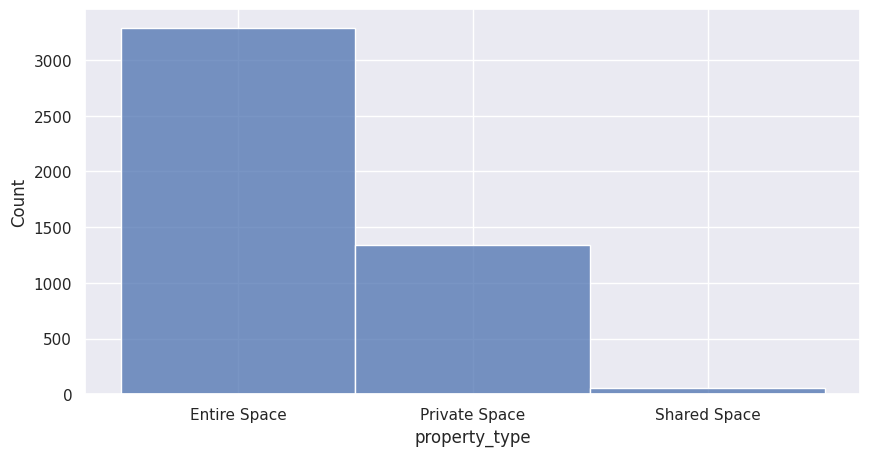

In [90]:
sns.histplot(listings_joined['property_type'])

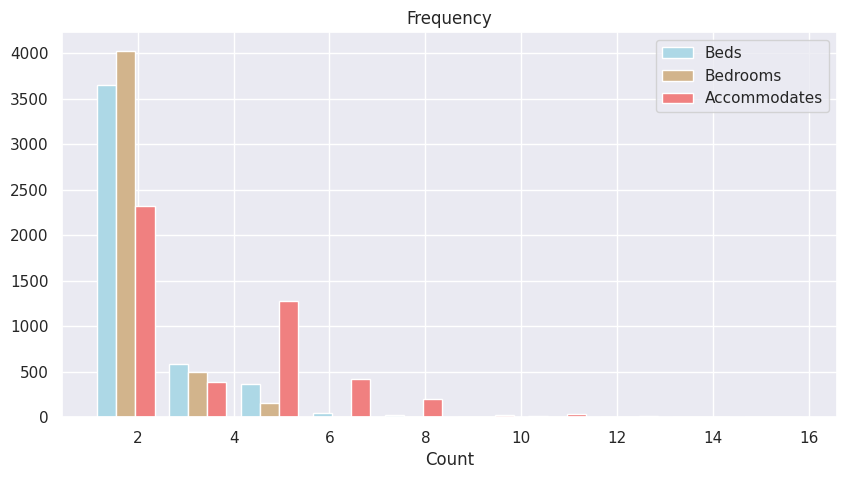

<Figure size 1000x500 with 0 Axes>

In [91]:
x = [listing2num['beds'],listing2num['bedrooms'],listing2num['accommodates']]
plt.hist(x,color=['lightblue','tan','lightcoral']) 
plt.legend(["Beds","Bedrooms", "Accommodates"])
plt.title('Frequency')
plt.xlabel('Count')
plt.show()
plt.savefig(r'1.png')

***3. TFIDF***

***We used TF-IDF to quantify each hosts description of their AirBnB in order to add a weight to each posting which can help us cluster better. TF-IDF is useful as it is a relative metric comparing across text only in our data.***

In [92]:
# "TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. ... 
# It has many uses, most importantly in automated text analysis, and 
# is very useful for scoring words in machine learning algorithms for Natural Language Processing (NLP)."

# source: https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

!python -m nltk.downloader stopwords

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
#cleaning the descriptions
from nltk.corpus import stopwords

def clean_text(string_in):
  string_in = re.sub("[^a-zA-Z]", " ", str(string_in))  # Replace all non-letters with spaces
  string_in = string_in.lower()                         # Tranform to lower case    
  return string_in.strip()

listings2nume["descriptions"] = listings2.name.apply(clean_text)

In [94]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
data = listings2nume["descriptions"]

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [95]:
scores = pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names_out())
scores = np.mean(scores).sort_values(ascending=False).to_frame('Score').reset_index().rename(columns={'index':'Word'})
scores_dict = dict(zip(scores['Word'], scores['Score']))
listings2nume['TF_IDF_Weight'] = 0

desc = listings2nume['descriptions'].reset_index().drop('index',axis=1)
desc = [x.split() for x in listings2nume["descriptions"]]

scoreslist = []

for i in np.arange(len(listings2nume['descriptions'])):
  words = desc[i]
  scoresl = [scores_dict.get(i) for i in words]
  sc = [x for x in scoresl if x is not None]
  prod = np.nanmean(sc)
  scoreslist.append(prod)

len(scoreslist) == len(listings2nume['descriptions'])

listings2nume['TF_IDF_Weight'] = scoreslist

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-95-84063687bc4a>:15: RuntimeWarning: Mean of empty slice
  prod = np.nanmean(sc)


In [96]:
listings2nume.head()

,accommodates,beds,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,id,property_type,descriptions,TF_IDF_Weight
1,3,2.0,1.0,194.0,2,30,371,4.86,1.0,958,Entire Space,bright modern garden unit br bth,0.015077
2,4,2.0,2.0,235.0,30,60,111,4.88,1.0,5858,Entire Space,creative sanctuary,0.001523
3,1,1.0,1.0,56.0,32,90,9,4.67,4.0,8142,Private Space,friendly room apt style ucsf usf san franc...,0.014163
4,4,2.0,2.0,575.0,9,91,28,4.87,1.0,8339,Entire Space,historic alamo square victorian,0.010007
5,3,1.0,1.0,129.0,1,26,761,4.91,1.0,8739,Private Space,mission sunshine with private bath,0.023777


***4. Sentiment Analysis***

***Performed sentiment analysis on customer comments to get an understanding of how positive or negative users experiences were with their stay at the different AirBnB's.***

In [97]:
listing_comments

,comments,listing_id
0,I arrived from France for few days and had a v...,144978
1,"Jay was absolutely wonderful. Helpful, warm, ...",144978
2,"Jay was a wonderful host. She was welcoming, k...",144978
3,"The bathrooms are in fair condition, but every...",144978
4,I stayed for 20 days and the place was comfort...,144978
...,...,...
330344,We really enjoyed our stay in the lovely home ...,487019
330345,Clean comfortable and well stocked place with ...,487019
330346,"Cecile's apartment is just as advertised, with...",487019
330347,"Séjour très agréable, bonnes indications, l’ap...",487019


In [98]:
# import Beautiful Soup, NumPy and Pandas, etc
import bs4 as bs
import numpy as np
import pandas as pd
import re
import hashlib
 
# download NLTK classifiers - these are cached locally on your machine
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# import ml classifiers
from nltk.tokenize import sent_tokenize # tokenizes sentences
from nltk.stem import PorterStemmer     # parsing/stemmer
from nltk.tag import pos_tag            # parts-of-speech tagging
from nltk.corpus import wordnet         # sentiment scores
from nltk.stem import WordNetLemmatizer # stem and context
from nltk.corpus import stopwords       # stopwords
from nltk.util import ngrams            # ngram iterator

# import word2vec
from gensim.test.utils import datapath
from gensim import utils
from gensim.models import Word2Vec

# import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [99]:
#to lowercase
listing_comments['comments'] = listing_comments['comments'].apply(lambda x: " ".join(x.lower() for x in x.split()))
listing_comments['comments']

<ipython-input-99-4242481b75df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_comments['comments'] = listing_comments['comments'].apply(lambda x: " ".join(x.lower() for x in x.split()))


0         i arrived from france for few days and had a v...
1         jay was absolutely wonderful. helpful, warm, f...
2         jay was a wonderful host. she was welcoming, k...
3         the bathrooms are in fair condition, but every...
4         i stayed for 20 days and the place was comfort...
                                ...                        
330344    we really enjoyed our stay in the lovely home ...
330345    clean comfortable and well stocked place with ...
330346    cecile's apartment is just as advertised, with...
330347    séjour très agréable, bonnes indications, l’ap...
330348    location was alright, but need to be aware sin...
Name: comments, Length: 330349, dtype: object

In [100]:
#strip punctuation
listing_comments['comments'] = listing_comments['comments'].str.replace('[^\w\s]','')
listing_comments['comments']

<ipython-input-100-f6259a9db1b7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  listing_comments['comments'] = listing_comments['comments'].str.replace('[^\w\s]','')
<ipython-input-100-f6259a9db1b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_comments['comments'] = listing_comments['comments'].str.replace('[^\w\s]','')


0         i arrived from france for few days and had a v...
1         jay was absolutely wonderful helpful warm frie...
2         jay was a wonderful host she was welcoming kin...
3         the bathrooms are in fair condition but everyt...
4         i stayed for 20 days and the place was comfort...
                                ...                        
330344    we really enjoyed our stay in the lovely home ...
330345    clean comfortable and well stocked place with ...
330346    ceciles apartment is just as advertised with t...
330347    séjour très agréable bonnes indications lappar...
330348    location was alright but need to be aware sinc...
Name: comments, Length: 330349, dtype: object

In [101]:
#stopwords
stop = stopwords.words('english')
listing_comments['comments'] = listing_comments['comments'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
listing_comments['comments']

<ipython-input-101-3b58ada08f57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_comments['comments'] = listing_comments['comments'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


0         arrived france days nice stay convenient local...
1         jay absolutely wonderful helpful warm friendly...
2         jay wonderful host welcoming kind home comfort...
3         bathrooms fair condition everything worked fin...
4         stayed 20 days place comfortable jay respectfu...
                                ...                        
330344    really enjoyed stay lovely home cecile daughte...
330345    clean comfortable well stocked place beautiful...
330346    ceciles apartment advertised tons light fabulo...
330347    séjour très agréable bonnes indications lappar...
330348    location alright need aware since close unsafe...
Name: comments, Length: 330349, dtype: object

In [102]:
#stemming
st = PorterStemmer()
listing_comments['comments'] = listing_comments['comments'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
listing_comments['comments']

<ipython-input-102-48fc18b5a00e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_comments['comments'] = listing_comments['comments'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


0         arriv franc day nice stay conveni local nice host
1         jay absolut wonder help warm friendli interest...
2         jay wonder host welcom kind home comfort would...
3         bathroom fair condit everyth work fine room co...
4         stay 20 day place comfort jay respect affectio...
                                ...                        
330344    realli enjoy stay love home cecil daughter cla...
330345    clean comfort well stock place beauti view wou...
330346    cecil apart advertis ton light fabul view twin...
330347    séjour trè agréabl bonn indic lappart une trè ...
330348    locat alright need awar sinc close unsaf neigh...
Name: comments, Length: 330349, dtype: object

In [103]:
#sentiment scores for all comments

#first score is sentiment polarity (whether the sentiment is positive or negative 
#second score is subjectivity score (how subjective is the text)

from textblob import TextBlob
def senti(x):
    return TextBlob(x).sentiment  

listing_comments['senti_score'] = listing_comments['comments'].apply(senti)

listing_comments.senti_score.head()

<ipython-input-103-e18027e578ff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_comments['senti_score'] = listing_comments['comments'].apply(senti)


0    (0.39999999999999997, 0.6666666666666666)
1                                   (0.8, 0.8)
2                                 (0.55, 0.75)
3                    (0.2833333333333333, 0.6)
4                    (0.0, 0.3333333333333333)
Name: senti_score, dtype: object

In [104]:
#final table w/ senti_score
#range of polarity: -1 to 1(negative to positive)-- tells if text contains positive or negative feedback
listings_joined_dropped['sentiment'] = listing_comments.senti_score.apply(lambda x: x[0])
listings_joined_dropped.head()

,accommodates,beds,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,id,Entire Space,Private Space,Shared Space,sentiment
1,3,2.0,1.0,194.0,2,30,371,4.86,1.0,958,1,0,0,0.800000
2,4,2.0,2.0,235.0,30,60,111,4.88,1.0,5858,1,0,0,0.550000
3,1,1.0,1.0,56.0,32,90,9,4.67,4.0,8142,0,1,0,0.283333
4,4,2.0,2.0,575.0,9,91,28,4.87,1.0,8339,1,0,0,0.000000
5,3,1.0,1.0,129.0,1,26,761,4.91,1.0,8739,0,1,0,0.100000


In [105]:
listings_joined_dropped['tfidf_score'] = listings2nume['TF_IDF_Weight']
listings_joined_dropped.head()

,accommodates,beds,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,id,Entire Space,Private Space,Shared Space,sentiment,tfidf_score
1,3,2.0,1.0,194.0,2,30,371,4.86,1.0,958,1,0,0,0.800000,0.015077
2,4,2.0,2.0,235.0,30,60,111,4.88,1.0,5858,1,0,0,0.550000,0.001523
3,1,1.0,1.0,56.0,32,90,9,4.67,4.0,8142,0,1,0,0.283333,0.014163
4,4,2.0,2.0,575.0,9,91,28,4.87,1.0,8339,1,0,0,0.000000,0.010007
5,3,1.0,1.0,129.0,1,26,761,4.91,1.0,8739,0,1,0,0.100000,0.023777


In [106]:
listings_joined_dropped = listings_joined_dropped.drop(columns=['id'])

In [107]:
listings_joined_dropped.fillna(np.mean(listings_joined_dropped['tfidf_score']), inplace=True)

In [108]:
from sklearn import preprocessing

normalized_listings = listings_joined_dropped.values
min_max_scaler = preprocessing.MinMaxScaler()
normalized_listings = min_max_scaler.fit_transform(normalized_listings)
listings_final = pd.DataFrame(normalized_listings)

listings_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.133333,0.066667,0.000,0.050932,0.000890,0.024288,0.379098,0.972,0.1,1.0,0.0,0.0,0.882353,0.360840
1,0.200000,0.066667,0.125,0.061696,0.025801,0.049414,0.112705,0.976,0.1,1.0,0.0,0.0,0.735294,0.033441
2,0.000000,0.000000,0.000,0.014702,0.027580,0.074539,0.008197,0.934,0.4,0.0,1.0,0.0,0.578431,0.338772
3,0.200000,0.066667,0.125,0.150958,0.007117,0.075377,0.027664,0.974,0.1,1.0,0.0,0.0,0.411765,0.238363
4,0.133333,0.000000,0.000,0.033867,0.000000,0.020938,0.778689,0.982,0.1,0.0,1.0,0.0,0.470588,0.570988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,0.066667,0.000000,0.000,0.045944,0.001779,0.022613,0.324795,0.990,0.1,1.0,0.0,0.0,0.639216,0.315501
4679,0.733333,0.200000,0.375,0.104752,0.000890,0.023451,0.063525,0.914,0.2,1.0,0.0,0.0,0.730392,0.255422
4680,0.066667,0.000000,0.000,0.032817,0.000000,0.081240,0.314549,0.982,0.1,0.0,1.0,0.0,0.627451,0.410045
4681,0.333333,0.200000,0.250,0.018378,0.000890,0.941374,0.131148,0.982,0.1,0.0,1.0,0.0,0.741830,0.401090


***5. KMeans Clustering***

***Finally, clustering! Grouping up our data to see what kind of similarities our algorithm can come up with!***

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

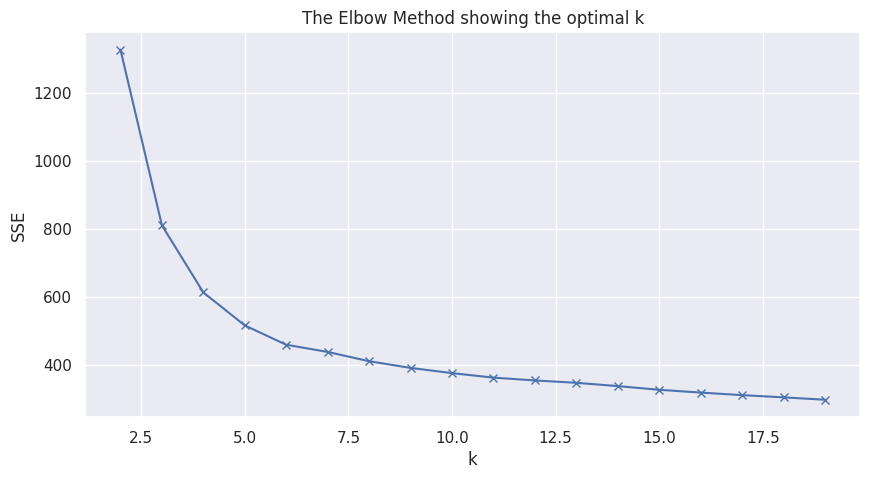

In [109]:
 #kmeans 
kvalues = np.arange(2, 20)
accuracy = []
clustervariance = {}
for k in kvalues:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(listings_final)
  score = silhouette_score(listings_final, kmeans.labels_)
  accuracy.append(score)
  clustervariance[k] = kmeans.inertia_
#plotting elbow chart
plt.plot(kvalues, list(clustervariance.values()), 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [110]:
def cluster_queen(df,k):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df) 
  cluster_labels = kmeans.labels_

  # assign these clusters back into the dataframe
  df = df.assign(cluster=cluster_labels)
  return df

In [111]:
listings_joined_dropped.head()

,accommodates,beds,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,Entire Space,Private Space,Shared Space,sentiment,tfidf_score
1,3,2.0,1.0,194.0,2,30,371,4.86,1.0,1,0,0,0.800000,0.015077
2,4,2.0,2.0,235.0,30,60,111,4.88,1.0,1,0,0,0.550000,0.001523
3,1,1.0,1.0,56.0,32,90,9,4.67,4.0,0,1,0,0.283333,0.014163
4,4,2.0,2.0,575.0,9,91,28,4.87,1.0,1,0,0,0.000000,0.010007
5,3,1.0,1.0,129.0,1,26,761,4.91,1.0,0,1,0,0.100000,0.023777


In [112]:
listings_joined_dropped = cluster_queen(listings_joined_dropped, 5)
listings_joined_dropped.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,accommodates,beds,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,Entire Space,Private Space,Shared Space,sentiment,tfidf_score,cluster
1,3,2.0,1.0,194.0,2,30,371,4.86,1.0,1,0,0,0.800000,0.015077,1
2,4,2.0,2.0,235.0,30,60,111,4.88,1.0,1,0,0,0.550000,0.001523,1
3,1,1.0,1.0,56.0,32,90,9,4.67,4.0,0,1,0,0.283333,0.014163,1
4,4,2.0,2.0,575.0,9,91,28,4.87,1.0,1,0,0,0.000000,0.010007,4
5,3,1.0,1.0,129.0,1,26,761,4.91,1.0,0,1,0,0.100000,0.023777,1


In [113]:
listings_joined_dropped.groupby('cluster').mean()

,accommodates,beds,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,Entire Space,Private Space,Shared Space,sentiment,tfidf_score
cluster,,,,,,,,,,,,,,
0,3.332421,1.929549,1.556772,210.409713,30.621751,1122.764022,47.668263,4.741108,1.262654,0.742134,0.250342,0.007524,0.401968,0.013830
1,2.877983,1.641603,1.340837,152.642053,11.531742,58.328231,88.361099,4.777722,1.214768,0.625394,0.358847,0.015759,0.397086,0.014026
2,7.054054,4.216216,3.351351,2202.891892,7.000000,398.702703,16.243243,4.900811,2.378378,0.837838,0.162162,0.000000,0.378349,0.009533
3,3.356908,1.917763,1.592105,179.358553,29.769737,381.261513,30.059211,4.726826,1.266447,0.740132,0.250000,0.009868,0.388653,0.014090
4,5.732394,3.208451,2.633803,572.594366,6.698592,66.326761,34.447887,4.894310,1.887324,0.949296,0.050704,0.000000,0.405745,0.011927


In [114]:
lat = listings.latitude
lon = listings.longitude
neighbourhood_cleansed = listings.neighbourhood_cleansed
name = listings.name
space = listings.property_type

***6. User Interface***

***Visualizing our clusters on a map of San Francisco. These colour-coded visuals can directly be used by people looking to stay in AirBnB's to find the best fit for them! We employed recursive clustering to allow for a more narrow search!***

In [115]:
!pip install geopandas
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import geopandas as gpd
import folium
from shapely.geometry import Point, Polygon
crs = {'init': 'epsg:4326'}

In [117]:
def mapping(df, lon, lat, name, neighbourhood_cleansed, space):
  df['latitude'] = lat
  df['longitude'] = lon
  geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=gpd.points_from_xy(df.longitude, df.latitude))
  geo_df['neighborhood'] = neighbourhood_cleansed
  geo_df['name'] = name
  geo_df['space'] = space

  m1 = folium.Map(location=[37.79, -122.41], zoom_start=14.5)
  folium.GeoJson(geo_df.geometry).add_to(m1)

  for row in geo_df.iterrows():
    row_values = row[1]
    center_point = row_values['geometry']
    location = [center_point.y, center_point.x]
    if row_values['cluster'] == 0:
      marker_color = 'lightred'
    elif row_values['cluster'] == 1:
      marker_color = 'blue'
    elif row_values['cluster'] == 2:
      marker_color = 'lightgreen'
    elif row_values['cluster'] == 3:
      marker_color = 'pink'
    else:
      marker_color = 'lightblue'
    popup = ('Name: ' + str(row_values['name']) + '\n' + 'Price: $' + str(row_values['price']) + '\n' + 'Rating: ' + str(row_values['review_scores_rating'])
    + '\n' + 'Bedrooms: ' + str(row_values['bedrooms']) + '\n' + 'Type: ' + str(row_values['space']) + '\n' + 'Neighborhood: ' + str(row_values['neighborhood']))
    marker = folium.Marker(location = location, popup = popup, icon=folium.Icon(color=marker_color, icon='home'))
    marker.add_to(m1)

  display(m1)
  return geo_df

In [118]:
new_df = mapping(listings_joined_dropped,lon,lat,name,neighbourhood_cleansed, space)

Output hidden; open in https://colab.research.google.com to view.

In [120]:
cluster_dict = {"lightred" :0,"blue":1,"lightgreen":2,"pink":3,"lightblue":4}

In [121]:
green = new_df[new_df['cluster'] == cluster_dict['lightgreen']]
red = new_df[new_df['cluster'] == cluster_dict['lightred']]
blue = new_df[new_df['cluster'] == cluster_dict['blue']]
print(len(green),len(red),len(blue))

37 1462 2221


In [130]:
pink = new_df[new_df['cluster'] == cluster_dict['pink']]
lightblue = new_df[new_df['cluster'] == cluster_dict['lightblue']]

In [132]:
print(len(pink),len(lightblue))

608 355


Which cluster do you want to explore? Choose a color.

In [133]:
color = "blue"

In [134]:
df_blue = new_df[new_df['cluster'] == cluster_dict[color]]
name = df_blue["name"]
neighbourhood_cleansed = df_blue["neighborhood"]
lon = df_blue["longitude"]
lat = df_blue["latitude"]
space = df_blue["space"]
df_blue = df_blue.drop(columns= ["longitude","latitude","neighborhood","name","cluster","geometry", "space"])
df_blue.head()

,accommodates,beds,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,Entire Space,Private Space,Shared Space,sentiment,tfidf_score
1,3,2.0,1.0,194.0,2,30,371,4.86,1.0,1,0,0,0.800000,0.015077
2,4,2.0,2.0,235.0,30,60,111,4.88,1.0,1,0,0,0.550000,0.001523
3,1,1.0,1.0,56.0,32,90,9,4.67,4.0,0,1,0,0.283333,0.014163
5,3,1.0,1.0,129.0,1,26,761,4.91,1.0,0,1,0,0.100000,0.023777
6,2,1.0,1.0,95.0,1,90,18,4.94,1.0,0,1,0,0.422802,0.020437


In [135]:
listings_joined_dropped_blue = cluster_queen(df_blue, 5)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [136]:
df_blue_map = mapping(listings_joined_dropped_blue, lon, lat, name, neighbourhood_cleansed, space)

Output hidden; open in https://colab.research.google.com to view.

Which cluster do you want to explore next? Choose a color.

In [137]:
color = "pink"

In [138]:
df_pink = new_df[new_df['cluster'] == cluster_dict[color]]
name = df_pink["name"]
neighbourhood_cleansed = df_pink["neighborhood"]
lon = df_pink["longitude"]
lat = df_pink["latitude"]
space = df_pink["space"]
df_pink = df_pink.drop(columns= ["longitude","latitude","neighborhood","name","cluster","geometry", "space"])
df_pink.head()

,accommodates,beds,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,Entire Space,Private Space,Shared Space,sentiment,tfidf_score
28,3,2.0,1.0,165.0,30,730,27,4.96,1.0,1,0,0,0.275000,0.015352
31,2,1.0,1.0,130.0,30,365,34,4.85,1.0,1,0,0,0.000000,0.018343
33,1,1.0,1.0,57.0,30,730,166,4.61,0.0,0,1,0,0.608333,0.015865
35,2,1.0,1.0,129.0,30,365,21,4.59,1.0,1,0,0,0.650000,0.013253
36,2,1.0,1.0,110.0,30,730,49,4.72,1.0,1,0,0,0.300000,0.014554


In [139]:
listings_joined_dropped_pink = cluster_queen(df_pink, 3)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [140]:
df_pink_map = mapping(listings_joined_dropped_pink, lon, lat, name, neighbourhood_cleansed, space)

/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [141]:
cluster_dict

{'lightred': 0, 'blue': 1, 'lightgreen': 2, 'pink': 3, 'lightblue': 4}

In [142]:
color = "lightgreen"

In [143]:
df_lightgreen = new_df[new_df['cluster'] == cluster_dict[color]]
name = df_lightgreen["name"]
neighbourhood_cleansed = df_lightgreen["neighborhood"]
lon = df_lightgreen["longitude"]
lat = df_lightgreen["latitude"]
space = df_lightgreen["space"]
df_lightgreen = df_lightgreen.drop(columns= ["longitude","latitude","neighborhood","name","cluster","geometry", "space"])
df_lightgreen.head()

,accommodates,beds,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,Entire Space,Private Space,Shared Space,sentiment,tfidf_score
112,6,3.0,3.0,1371.0,7,365,16,5.00,2.0,1,0,0,0.000000,0.011291
188,6,6.0,3.0,1495.0,4,1125,34,4.94,2.0,1,0,0,0.468182,0.012093
276,8,4.0,4.0,1557.0,7,30,10,4.70,3.0,1,0,0,0.393750,0.016564
309,2,1.0,1.0,3500.0,90,600,31,4.84,1.0,0,1,0,0.900000,0.009999
367,9,4.0,4.0,2000.0,5,1125,2,5.00,3.0,1,0,0,0.000000,0.014419


In [144]:
listings_joined_dropped_lightgreen = cluster_queen(df_lightgreen, 3)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [145]:
df_lightgreen_map = mapping(listings_joined_dropped_lightgreen, lon, lat, name, neighbourhood_cleansed, space)

/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [146]:
color = "lightred"

In [147]:
df_lightred = new_df[new_df['cluster'] == cluster_dict[color]]
name = df_lightred["name"]
neighbourhood_cleansed = df_lightred["neighborhood"]
lon = df_lightred["longitude"]
lat = df_lightred["latitude"]
space = df_lightred["space"]
df_lightred = df_lightred.drop(columns= ["longitude","latitude","neighborhood","name","cluster","geometry", "space"])
df_lightred.head()

,accommodates,beds,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,Entire Space,Private Space,Shared Space,sentiment,tfidf_score
8,4,2.0,2.0,115.0,30,1125,44,4.78,1.0,1,0,0,0.402778,0.011784
18,2,1.0,1.0,119.0,30,1125,133,4.98,1.0,1,0,0,0.322222,0.009070
56,1,1.0,1.0,90.0,13,1125,105,4.85,1.0,0,1,0,0.800000,0.018803
59,4,3.0,2.0,249.0,30,1125,23,4.95,1.0,1,0,0,0.358974,0.018939
64,1,1.0,1.0,115.0,1,1125,680,4.87,1.0,0,1,0,0.453333,0.022700


In [148]:
listings_joined_dropped_lightred = cluster_queen(df_lightred, 3)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [149]:
df_lightred_map = mapping(listings_joined_dropped_lightred, lon, lat, name, neighbourhood_cleansed, space)

Output hidden; open in https://colab.research.google.com to view.

In [150]:
color = "lightblue"

In [151]:
df_lightblue = new_df[new_df['cluster'] == cluster_dict[color]]
name = df_lightblue["name"]
neighbourhood_cleansed = df_lightblue["neighborhood"]
lon = df_lightblue["longitude"]
lat = df_lightblue["latitude"]
space = df_lightblue["space"]
df_lightblue = df_lightblue.drop(columns= ["longitude","latitude","neighborhood","name","cluster","geometry", "space"])
df_lightblue.head()

,accommodates,beds,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,Entire Space,Private Space,Shared Space,sentiment,tfidf_score
4,4,2.0,2.0,575.0,9,91,28,4.87,1.0,1,0,0,0.000000,0.010007
67,6,4.0,3.0,580.0,7,365,23,4.95,2.0,1,0,0,0.312000,0.010386
75,4,2.0,2.0,425.0,5,25,231,4.91,1.0,1,0,0,0.666667,0.014712
76,6,3.0,3.0,495.0,3,60,22,4.86,2.0,1,0,0,0.440000,0.008965
82,2,1.0,1.0,395.0,30,180,23,4.83,1.0,1,0,0,0.473333,0.007461


In [152]:
listings_joined_dropped_lightblue = cluster_queen(df_lightblue, 3)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [153]:
df_lightblue_map = mapping(listings_joined_dropped_lightblue, lon, lat, name, neighbourhood_cleansed, space)

/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [154]:
df_blue.price.mean()

152.64205312922107

In [155]:
df_pink.price.mean()

179.35855263157896

In [156]:
df_lightgreen.price.mean()

2202.891891891892

In [157]:
df_lightred.price.mean()

210.40971272229822

In [158]:
df_lightblue.price.mean()

572.5943661971831